In [4]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [5]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [4]:
import os

for dirpath,dirnames,filenames in os.walk('./Datasets/10_food_classes_10_percent'):
    print("{} files and {} directories and path is {}".format(len(filenames),len(dirnames),dirpath))

0 files and 2 directories and path is ./Datasets/10_food_classes_10_percent
0 files and 10 directories and path is ./Datasets/10_food_classes_10_percent\test
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\chicken_curry
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\chicken_wings
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\fried_rice
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\grilled_salmon
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\hamburger
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\ice_cream
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\pizza
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\ramen
250 files and 0 directories and path is ./Datasets/10_food_classes_10_percent\test\steak
250

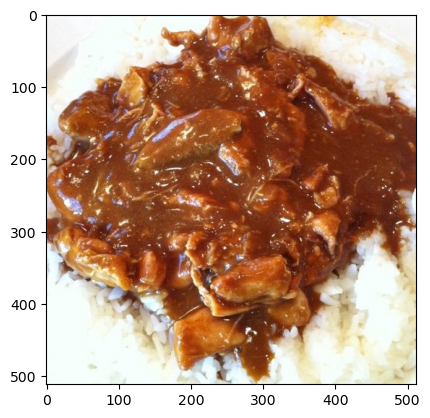

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_image = './Datasets/10_food_classes_10_percent/train/chicken_curry/1071242.jpg'

plt.imshow(mpimg.imread(path_image))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './Datasets/10_food_classes_10_percent/train/'
test_dir = './Datasets/10_food_classes_10_percent/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
    logs=dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)
    return tensorboard_callback

In [11]:
def create_model(model_url,num_classes=10):
    
    feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable = False,
                                            input_shape=(224,224,3))
    
    model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes,activation = 'softmax')
    ])
    
    return model

In [9]:
model = create_model(resnet_url)

In [10]:
model.build([None, 224, 224, 3])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [12]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [13]:
len(train_generator)

24

In [14]:
history = model.fit(train_generator,
                    epochs = 5,
                    steps_per_epoch = len(train_generator),
                    validation_data = test_generator,
                    validation_steps = len(test_generator),
                    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

Epoch 1/5
24/24 [==============================] - 97s 4s/step - loss: 1.8602 - accuracy: 0.3467 - val_loss: 1.1824 - val_accuracy: 0.6220
Epoch 2/5
24/24 [==============================] - 93s 4s/step - loss: 0.8854 - accuracy: 0.7320 - val_loss: 0.8296 - val_accuracy: 0.7336
Epoch 3/5
24/24 [==============================] - 91s 4s/step - loss: 0.6086 - accuracy: 0.8200 - val_loss: 0.7478 - val_accuracy: 0.7596
Epoch 4/5
24/24 [==============================] - 98s 4s/step - loss: 0.4760 - accuracy: 0.8867 - val_loss: 0.7116 - val_accuracy: 0.7604
Epoch 5/5
24/24 [==============================] - 93s 4s/step - loss: 0.3772 - accuracy: 0.9120 - val_loss: 0.6766 - val_accuracy: 0.7720


In [17]:
def plot_loss_curve(history):
    train_loss = history.history["loss"]
    train_accuracy = history.history["accuracy"]
    
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs,train_loss,label="training loss")
    plt.plot(epochs,val_loss,label="validation loss")
    plt.xlabel("Epochs")
    plt.title("Loss")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,train_accuracy,label="training loss")
    plt.plot(epochs,val_accuracy,label="validation loss")
    plt.xlabel("Epochs")
    plt.title("Accuracy")
    plt.legend()

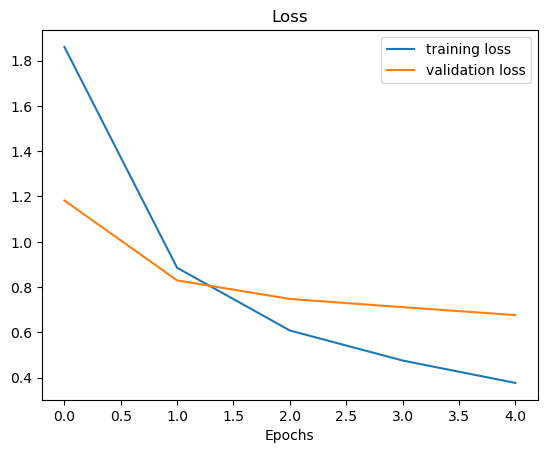

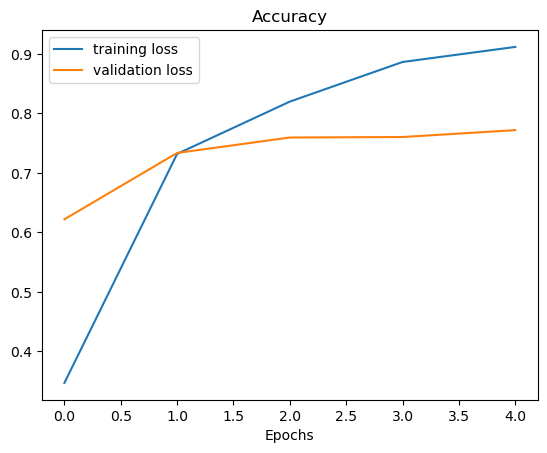

In [16]:
plot_loss_curve(history)

In [17]:
!nvidia-smi

Sun Jun 25 17:24:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8     6W /  N/A |      8MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
model = create_model(efficientnet_url)

In [13]:
model.build([None, 224, 224, 3])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [15]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator,
                    epochs = 5,
                    steps_per_epoch = len(train_generator),
                    validation_data = test_generator,
                    validation_steps = len(test_generator),
                    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="efficient_netb0")])

Epoch 1/5
24/24 [==============================] - 71s 3s/step - loss: 1.8737 - accuracy: 0.4427 - val_loss: 1.3143 - val_accuracy: 0.7340
Epoch 2/5
24/24 [==============================] - 61s 3s/step - loss: 1.0644 - accuracy: 0.7880 - val_loss: 0.8669 - val_accuracy: 0.8196
Epoch 3/5
24/24 [==============================] - 59s 3s/step - loss: 0.7593 - accuracy: 0.8373 - val_loss: 0.6982 - val_accuracy: 0.8440
Epoch 4/5
24/24 [==============================] - 59s 3s/step - loss: 0.6090 - accuracy: 0.8693 - val_loss: 0.6114 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 60s 3s/step - loss: 0.5159 - accuracy: 0.8947 - val_loss: 0.5570 - val_accuracy: 0.8584


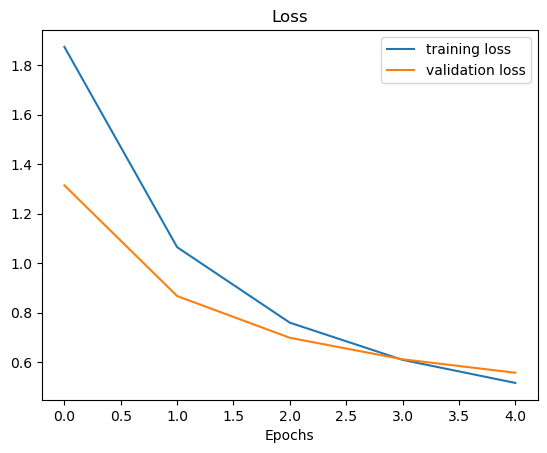

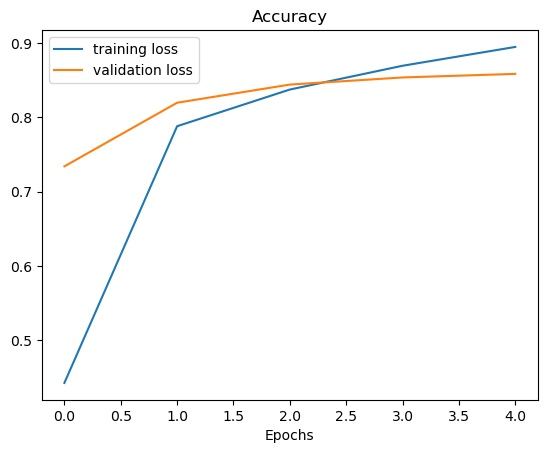

In [18]:
plot_loss_curve(history)